In [273]:
import pandas as pd
import numpy as np

# Generate a dataset with 5000 rows
np.random.seed(42)
n_samples = 5000

# Simulate data for a traffic flow dataset
timestamps = pd.date_range(start="2023-01-01", periods=n_samples, freq='h')  # Changed 'H' to 'h'
bangalore_locations = [
    'MG Road', 'Koramangala', 'Indiranagar', 'Marathahalli',
    'Jayanagar', 'Banaswadi', 'Whitefield', 'BTM Layout',
    'Bannerghatta Road', 'Hebbal'
]
weather_conditions = ['Clear', 'Rain', 'Snow', 'Fog']
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Simulate traffic volumes (in vehicles per hour)
traffic_volume = np.random.randint(50, 500, size=n_samples).astype(float)  # Convert to float

# Introduce missing values randomly in traffic_volume
missing_indices = np.random.choice(n_samples, size=int(n_samples * 0.1), replace=False)  # 10% missing
traffic_volume[missing_indices] = np.nan

# Add some outliers to the traffic volume
outlier_indices = np.random.choice(n_samples, size=50, replace=False)
traffic_volume[outlier_indices] = np.random.randint(1000, 2000, size=50)  # Extreme outliers

# Simulate weather, day of the week, and location data
weather = np.random.choice(weather_conditions, size=n_samples)
day_of_week = np.random.choice(days_of_week, size=n_samples)
location = np.random.choice(bangalore_locations, size=n_samples)

# Combine all features into a dataframe
df = pd.DataFrame({
    'Timestamp': timestamps,
    'Month': timestamps.month,  # Extract month
    'Location': location,
    'Weather': weather,
    'Day_of_Week': day_of_week,
    'Traffic_Volume': traffic_volume
})

# Convert 'Month' to integers to ensure proper merge
df['Month'] = df['Month'].astype(int)

# Ensure all months are covered (1 to 12)
all_months = pd.DataFrame({'Month': range(1, 13)})

# Merge original data with all 12 months to add missing months
df_complete = pd.merge(all_months, df, on='Month', how='left')

# Fill missing traffic volume with mean value
df_complete['Traffic_Volume'] = df_complete['Traffic_Volume'].fillna(df_complete['Traffic_Volume'].mean())

# Save the DataFrame to a CSV file
df_complete.to_csv('traffic_data_bangalore.csv', index=False)

print("CSV file 'traffic_data_bangalore.csv' has been created.")


CSV file 'traffic_data_bangalore.csv' has been created.


In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [275]:
df = pd.read_csv("traffic_data_bangalore.csv")

In [276]:
df.head()

,Month,Timestamp,Location,Weather,Day_of_Week,Traffic_Volume
0,1,2023-01-01 00:00:00,Banaswadi,Snow,Wednesday,152.0
1,1,2023-01-01 01:00:00,Whitefield,Rain,Wednesday,485.0
2,1,2023-01-01 02:00:00,BTM Layout,Snow,Monday,398.0
3,1,2023-01-01 03:00:00,Jayanagar,Snow,Wednesday,320.0
4,1,2023-01-01 04:00:00,Indiranagar,Snow,Tuesday,156.0


In [277]:
df.isnull().sum()

,0
Month,0
Timestamp,5
Location,5
Weather,5
Day_of_Week,5
Traffic_Volume,0


In [278]:
df['Traffic_Volume'] = df['Traffic_Volume'].fillna(df['Traffic_Volume'].mean())

In [279]:
df.isnull().sum()

,0
Month,0
Timestamp,5
Location,5
Weather,5
Day_of_Week,5
Traffic_Volume,0


<Axes: xlabel='Traffic_Volume', ylabel='Density'>

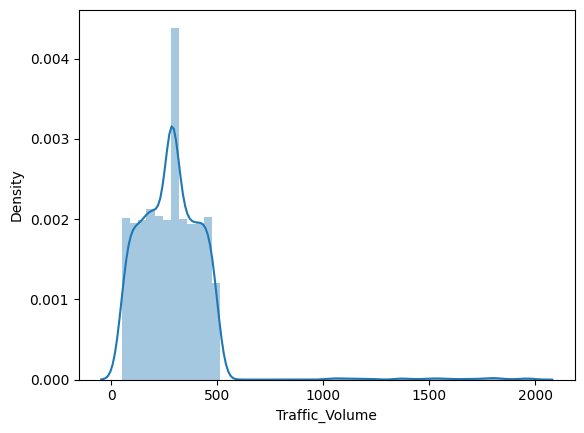

In [280]:
sns.distplot(df['Traffic_Volume'])

<Axes: ylabel='Traffic_Volume'>

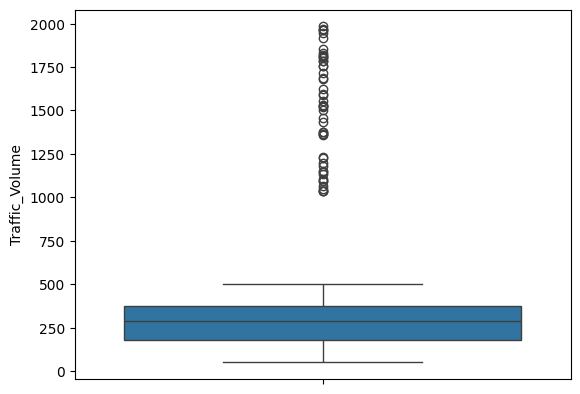

In [281]:
sns.boxplot(df['Traffic_Volume'])

In [282]:
# lets handle outliers through iqr method
Q1 = df['Traffic_Volume'].quantile(0.25)
Q3 = df['Traffic_Volume'].quantile(0.75)
IQR = Q3 - Q1
IQR

201.0

In [283]:
Upper_limit = Q3 + 1.5 * IQR
Lower_limit = Q1 - 1.5 * IQR

In [284]:
print(Upper_limit)
print(Lower_limit)

678.5
-125.5


In [285]:

# Replace outliers with the median
median_value = df['Traffic_Volume'].median()
df['Traffic_Volume'] = np.where(
    (df['Traffic_Volume'] < Lower_limit) | (df['Traffic_Volume'] > Upper_limit),
    median_value,
    df['Traffic_Volume']
)

<Axes: xlabel='Traffic_Volume', ylabel='Density'>

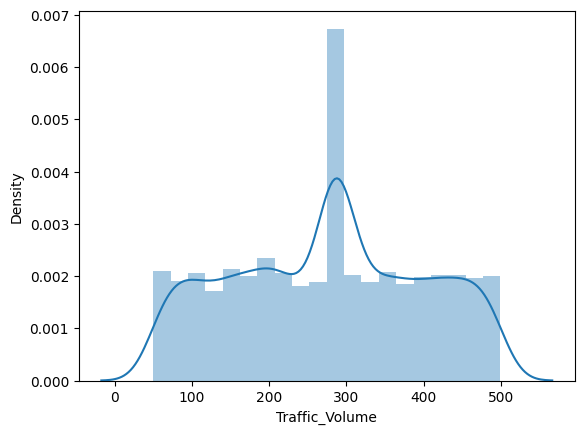

In [286]:
sns.distplot(df['Traffic_Volume'])

<Axes: ylabel='Traffic_Volume'>

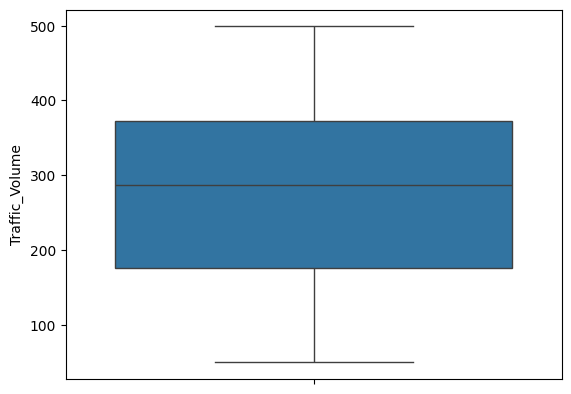

In [287]:
sns.boxplot(df['Traffic_Volume'])

<Axes: xlabel='Weather', ylabel='Traffic_Volume'>

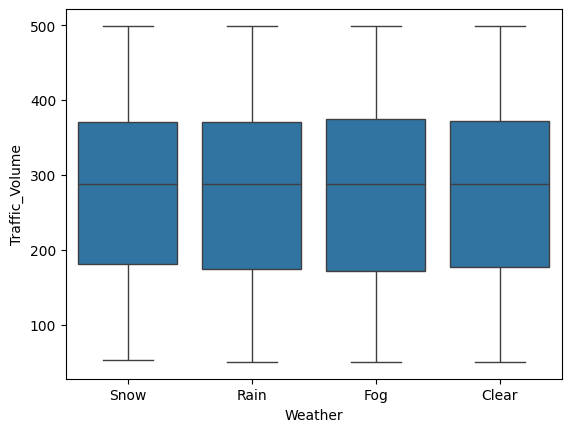

In [288]:
sns.boxplot(x='Weather', y='Traffic_Volume', data=df)

<Axes: xlabel='Location', ylabel='Traffic_Volume'>

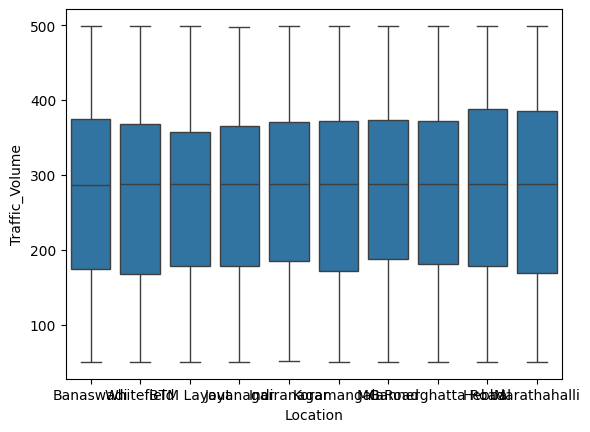

In [289]:
sns.boxplot(x='Location', y='Traffic_Volume', data=df)

<Axes: xlabel='Day_of_Week', ylabel='Traffic_Volume'>

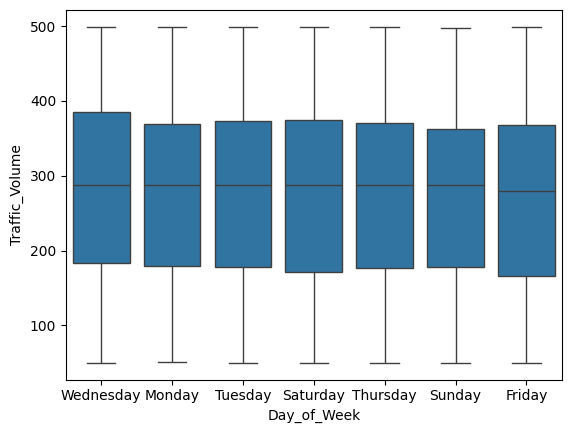

In [290]:
sns.boxplot(x='Day_of_Week', y='Traffic_Volume', data=df)

In [291]:
# Convert Timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Now extract time-based features
df['Hour'] = df['Timestamp'].dt.hour
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month
df['Is_Weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)


In [292]:
df.head()

,Month,Timestamp,Location,Weather,Day_of_Week,Traffic_Volume,Hour,Is_Weekend
0,1.0,2023-01-01 00:00:00,Banaswadi,Snow,6.0,152.0,0.0,1
1,1.0,2023-01-01 01:00:00,Whitefield,Rain,6.0,485.0,1.0,1
2,1.0,2023-01-01 02:00:00,BTM Layout,Snow,6.0,398.0,2.0,1
3,1.0,2023-01-01 03:00:00,Jayanagar,Snow,6.0,320.0,3.0,1
4,1.0,2023-01-01 04:00:00,Indiranagar,Snow,6.0,156.0,4.0,1


In [293]:
df['Day_of_Week'].value_counts()

,count
Day_of_Week,
6.0,720
0.0,720
1.0,720
2.0,720
3.0,720
4.0,704
5.0,696


In [294]:
df.drop('Timestamp', axis=1, inplace=True)

In [295]:
df.head()

,Month,Location,Weather,Day_of_Week,Traffic_Volume,Hour,Is_Weekend
0,1.0,Banaswadi,Snow,6.0,152.0,0.0,1
1,1.0,Whitefield,Rain,6.0,485.0,1.0,1
2,1.0,BTM Layout,Snow,6.0,398.0,2.0,1
3,1.0,Jayanagar,Snow,6.0,320.0,3.0,1
4,1.0,Indiranagar,Snow,6.0,156.0,4.0,1


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           5000 non-null   float64
 1   Location        5000 non-null   object 
 2   Weather         5000 non-null   object 
 3   Day_of_Week     5000 non-null   float64
 4   Traffic_Volume  5005 non-null   float64
 5   Hour            5000 non-null   float64
 6   Is_Weekend      5005 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 273.8+ KB


In [297]:
df.head()

,Month,Location,Weather,Day_of_Week,Traffic_Volume,Hour,Is_Weekend
0,1.0,Banaswadi,Snow,6.0,152.0,0.0,1
1,1.0,Whitefield,Rain,6.0,485.0,1.0,1
2,1.0,BTM Layout,Snow,6.0,398.0,2.0,1
3,1.0,Jayanagar,Snow,6.0,320.0,3.0,1
4,1.0,Indiranagar,Snow,6.0,156.0,4.0,1


In [298]:
# One-Hot Encoding for 'Location' and 'Weather' columns
df_encoded = pd.get_dummies(df, columns=['Location', 'Weather'], drop_first=True)

# Convert all boolean columns (from one-hot encoding) to integers
bool_columns = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)


In [299]:
df_encoded

,Month,Day_of_Week,Traffic_Volume,Hour,Is_Weekend,Location_Banaswadi,Location_Bannerghatta Road,Location_Hebbal,Location_Indiranagar,Location_Jayanagar,Location_Koramangala,Location_MG Road,Location_Marathahalli,Location_Whitefield,Weather_Fog,Weather_Rain,Weather_Snow
0,1.0,6.0,152.000000,0.0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,1.0,6.0,485.000000,1.0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,1.0,6.0,398.000000,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,6.0,320.000000,3.0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,1.0,6.0,156.000000,4.0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,NaN,NaN,287.520967,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
5001,NaN,NaN,287.520967,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
5002,NaN,NaN,287.520967,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
5003,NaN,NaN,287.520967,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0


In [300]:
df = df_encoded

In [301]:
df.isnull().sum()

,0
Month,5
Day_of_Week,5
Traffic_Volume,0
Hour,5
Is_Weekend,0
Location_Banaswadi,0
Location_Bannerghatta Road,0
Location_Hebbal,0
Location_Indiranagar,0
Location_Jayanagar,0


In [302]:
#drop null values
df = df.dropna()

In [303]:
df.head()

,Month,Day_of_Week,Traffic_Volume,Hour,Is_Weekend,Location_Banaswadi,Location_Bannerghatta Road,Location_Hebbal,Location_Indiranagar,Location_Jayanagar,Location_Koramangala,Location_MG Road,Location_Marathahalli,Location_Whitefield,Weather_Fog,Weather_Rain,Weather_Snow
0,1.0,6.0,152.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,1.0,6.0,485.0,1.0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,1.0,6.0,398.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,6.0,320.0,3.0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,1.0,6.0,156.0,4.0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [304]:
X = df.drop('Traffic_Volume', axis=1)
y = df['Traffic_Volume']

In [305]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [322]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Train-Test Split (without scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scaling (fit on training data, transform both train and test data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform on test data

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [307]:
from sklearn.neighbors import KNeighborsRegressor # Changed to KNeighborsRegressor

# Initialize the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the scaled data
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [308]:
# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)


In [309]:
y_pred

array([262.70419348, 311.8       , 224.60838695, 241.2       ,
       209.8       , 222.11258043, 210.90419348, 271.80838695,
       308.8       , 259.        , 203.40838695, 212.80838695,
       249.60838695, 262.50419348, 204.90419348, 213.6       ,
       201.2       , 354.30419348, 270.80838695, 259.90419348,
       213.60838695, 248.00838695, 277.        , 260.40838695,
       255.10419348, 239.20838695, 269.11258043, 282.4       ,
       282.90419348, 260.30419348, 222.2       , 253.70419348,
       303.90419348, 231.8       , 228.10419348, 286.00838695,
       209.8       , 323.90419348, 169.4       , 295.2       ,
       279.30419348, 286.90419348, 332.30419348, 263.50419348,
       198.2       , 279.30419348, 225.40838695, 201.20838695,
       259.8       , 276.70419348, 184.        , 266.        ,
       204.10419348, 217.10419348, 279.30419348, 225.60838695,
       254.90419348, 241.6       , 280.90419348, 210.90419348,
       302.30419348, 277.80838695, 209.8       , 306.4 

In [310]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 17627.685984728843


In [311]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 132.7692960918632


In [312]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 111.2140041712891


In [313]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: -0.14643661538379282


In [314]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_test_scaled.shape[1]  # Number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")



Adjusted R-squared: -0.16509682478983634


In [316]:
import pickle

# Assuming 'model' is your trained model
# Save the model to a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)


In [321]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example new data
new_data = [[5, 'Koramangala', 'Rain', 12]]

# Create a DataFrame for the new data to mimic the structure of the training data
new_data_df = pd.DataFrame(new_data, columns=['Month', 'Location', 'Weather', 'Hour'])

# Perform one-hot encoding on the new data DataFrame
new_data_encoded = pd.get_dummies(new_data_df, columns=['Location', 'Weather'], drop_first=True)

# Reindex the encoded DataFrame to match the columns of the training data
# This ensures that any missing columns from one-hot encoding are added with 0 values
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0) # X_train is your original training data

# Now you can scale the encoded data
new_data_scaled = scaler.transform(new_data_encoded)

# Make predictions
predictions = model.predict(new_data_scaled)
print(f"Predicted Traffic Volume: {predictions[0]}")

Predicted Traffic Volume: 244.50419347681387
